In [1]:
from google.colab import files

uploaded = files.upload()

Saving SuperScanDiagnostics.csv to SuperScanDiagnostics.csv


Import clean csv file in the zip, one is txt. the other has alot of white spaces/fomatting issues 


In [2]:
import io
import pandas as pd 
df = pd.read_csv(io.BytesIO(uploaded['SuperScanDiagnostics.csv']))

In order to avoid issues with white spaces in the columns 



In [3]:
# Must insert a code that will replace (' ') to ("_").
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
df

,service_number,service_zip,exam_date,exam_body_part,exam_cost,doctor_npi,doctor_name,patient_name,patient_birth_date,claimant_ssn
0,10000,73170,2018-10-10,shoulder,506.24,5556983867,Rosser,"Ruley, Lashaunda",1981-11-24,000-85-2224
1,10001,76907,2018-11-24,brain,997.90,5556983867,Rosser,"Rosser, Chante",1970-01-02,000-94-4818
2,10002,73170,2018-12-21,shoulder,393.84,5556983867,Rosser,"Ricklefs, Angelo",1980-12-18,000-63-2106
3,10003,73170,2019-03-04,shoulder,732.37,5556983867,Rosser,"Knop, Maia",1998-09-06,000-45-3839
4,10004,73170,2019-03-12,knee,730.37,5556983867,Rosser,"Rosser, Katherina",1967-07-04,000-80-8368
...,...,...,...,...,...,...,...,...,...,...
1843,11843,76907,2018-08-25,lumbar,382.74,5553283038,Macek,"Korn, Marchelle",1972-12-21,000-75-5433
1844,11844,76907,2018-07-31,lumbar,630.23,5553283038,Macek,"Demaree, Charmain",1949-05-12,000-71-4963
1845,11845,73170,2019-02-26,cervical,191.68,5553283038,Macek,"Rosser, Desire",1969-01-26,000-19-8166
1846,11846,51586,2018-11-08,lumbar,769.87,5553283038,Macek,"Moldenhauer, Chante",1945-07-15,000-79-1838


In [ ]:
df.head(50)

Want to obtain a list of the columns to make sure every thing is pulled, and with ['_']

In [5]:
list(df)

['service_number',
 'service_zip',
 'exam_date',
 'exam_body_part',
 'exam_cost',
 'doctor_npi',
 'doctor_name',
 'patient_name',
 'patient_birth_date',
 'claimant_ssn']

From this we can see the only true continuous variable in this dataset is exam costs 

Other columns are categorial, those with int64 values are just integers used for identification. 

In [6]:
df.dtypes

service_number          int64
service_zip             int64
exam_date              object
exam_body_part         object
exam_cost             float64
doctor_npi              int64
doctor_name            object
patient_name           object
patient_birth_date     object
claimant_ssn           object
dtype: object

# Printing details of the dataframe

In [7]:
print("Index/Labels")
print(df.index)     # “the index” (aka “the labels”)
print()

print("Column Names")
print(df.columns)   # column names (which is “an index”)
print()

print("Feature Types")
print(df.dtypes)    # data types of each column
print()

print("Shape details:")
print(df.shape)     # number of rows and columns

Index/Labels
RangeIndex(start=0, stop=1848, step=1)

Column Names
Index(['service_number', 'service_zip', 'exam_date', 'exam_body_part',
       'exam_cost', 'doctor_npi', 'doctor_name', 'patient_name',
       'patient_birth_date', 'claimant_ssn'],
      dtype='object')

Feature Types
service_number          int64
service_zip             int64
exam_date              object
exam_body_part         object
exam_cost             float64
doctor_npi              int64
doctor_name            object
patient_name           object
patient_birth_date     object
claimant_ssn           object
dtype: object

Shape details:
(1848, 10)


# Print value counts of the catgeories that will be useful for analysis

In [8]:
print("exam_date")
print(df['exam_date'].value_counts())
print()

print("exam_body_part ")
print(df['exam_body_part'].value_counts())
print()

print("exam_cost")
print(df['exam_cost'].value_counts())
print()

exam_date
2018-12-11    14
2019-03-11    13
2019-02-14    12
2018-06-10    12
2018-05-17    11
              ..
2018-07-09     1
2018-07-16     1
2018-12-20     1
2018-05-07     1
2018-08-18     1
Name: exam_date, Length: 332, dtype: int64

exam_body_part 
shoulder    437
lumbar      427
cervical    424
knee        424
brain        71
neck         65
Name: exam_body_part, dtype: int64

exam_cost
514.20    2
818.48    2
547.31    2
460.41    2
442.10    2
         ..
786.89    1
768.40    1
657.70    1
220.10    1
563.73    1
Name: exam_cost, Length: 1824, dtype: int64



Seeing value counts of the exam body part lets me know if "SuperScan diagnostics" focuses on a speciality (MSK,Spine, or Neuro) or a general practice 

In [9]:
print("doctor_name")
print(df['doctor_name'].value_counts())
print()



doctor_name
Burke       493
Michalik    475
Macek       458
Rosser      422
Name: doctor_name, dtype: int64



In [10]:
df['doctor_name']         # select one column
type(df['doctor_name'])   # determine datatype of column (e.g., Series)
df.doctor_name 

0       Rosser
1       Rosser
2       Rosser
3       Rosser
4       Rosser
         ...  
1843     Macek
1844     Macek
1845     Macek
1846     Macek
1847     Macek
Name: doctor_name, Length: 1848, dtype: object

In [11]:
df['doctor_name'].value_counts()

Burke       493
Michalik    475
Macek       458
Rosser      422
Name: doctor_name, dtype: int64

In [12]:
Macek = df[df['doctor_name']== 'doctor_name']

# This allows me to review the data for one particular doctor in this case its Macek.

In [13]:
Macek = df[df['doctor_name'] == 'Macek']
Macek

,service_number,service_zip,exam_date,exam_body_part,exam_cost,doctor_npi,doctor_name,patient_name,patient_birth_date,claimant_ssn
1390,11390,73170,2018-11-12,cervical,303.34,5553283038,Macek,"Macek, Fausto",1970-03-18,000-75-7343
1391,11391,73170,2018-04-21,lumbar,540.20,5553283038,Macek,"Lumpkins, Charmain",1973-10-07,000-25-1616
1392,11392,51586,2018-12-02,lumbar,475.14,5553283038,Macek,"Jablonski, Ronna",1961-02-03,000-48-8998
1393,11393,73608,2018-05-11,cervical,908.76,5553283038,Macek,"Loden, Marianna",1994-01-04,000-72-2783
1394,11394,51586,2018-08-12,neck,562.29,5553283038,Macek,"Marcus, Lashaunda",1974-05-17,000-99-3467
...,...,...,...,...,...,...,...,...,...,...
1843,11843,76907,2018-08-25,lumbar,382.74,5553283038,Macek,"Korn, Marchelle",1972-12-21,000-75-5433
1844,11844,76907,2018-07-31,lumbar,630.23,5553283038,Macek,"Demaree, Charmain",1949-05-12,000-71-4963
1845,11845,73170,2019-02-26,cervical,191.68,5553283038,Macek,"Rosser, Desire",1969-01-26,000-19-8166
1846,11846,51586,2018-11-08,lumbar,769.87,5553283038,Macek,"Moldenhauer, Chante",1945-07-15,000-79-1838


# Group by command on the doctors to see descriptive statistics. 

In [14]:
df_group_doctors = df.groupby(['doctor_name'])
df_group_doctors.describe()

service_number           ...    doctor_npi              
                     count     mean  ...           75%           max
doctor_name                          ...                            
Burke                493.0  10668.0  ...  5.553184e+09  5.553184e+09
Macek                458.0  11618.5  ...  5.553283e+09  5.553283e+09
Michalik             475.0  11152.0  ...  5.558050e+09  5.558050e+09
Rosser               422.0  10210.5  ...  5.556984e+09  5.556984e+09

[4 rows x 32 columns]

Appears Dr. Rooser had the highest mean cost for exams at $564, but he also preformed the least amount of exams. 

In [15]:
df_group_bodypart = df.groupby(['exam_body_part'])
df_group_bodypart.describe()

service_number                ...    doctor_npi              
                        count          mean  ...           75%           max
exam_body_part                               ...                            
brain                    71.0  10948.056338  ...  5.557517e+09  5.558050e+09
cervical                424.0  11292.992925  ...  5.558050e+09  5.558050e+09
knee                    424.0  10528.655660  ...  5.556984e+09  5.558050e+09
lumbar                  427.0  11325.442623  ...  5.558050e+09  5.558050e+09
neck                     65.0  10986.846154  ...  5.558050e+09  5.558050e+09
shoulder                437.0  10541.940503  ...  5.556984e+09  5.558050e+09

[6 rows x 32 columns]

In [ ]:
df_group_cost = df.groupby(['exam_cost'])
df_group_cost.describe()

In [ ]:
df_group_zip = df.groupby(['service_zip'])
df_group_zip.describe()

In [ ]:
df.describe()          # describe all numeric columns
df.describe(include=['object']) # describe all object columns
df.describe(include='all')      # describe all columns

# Created new dataframe to capture only the important variables 

In [4]:
df2 = pd.DataFrame(df[['exam_cost', 'exam_body_part','doctor_name',]])
df2 = df2.groupby(['exam_body_part','doctor_name',])
df2 = df2.mean()
df2 = df2.sort_values(by=['exam_cost'], ascending= False)
print(df2.head(30))
print()
print(df2.tail(30))


                             exam_cost
exam_body_part doctor_name            
neck           Rosser       718.278333
brain          Rosser       663.077000
neck           Burke        639.656154
shoulder       Michalik     638.771429
knee           Macek        637.738750
brain          Burke        611.110000
               Michalik     597.682778
neck           Macek        593.505333
cervical       Macek        565.613060
               Michalik     561.202709
shoulder       Rosser       559.804511
cervical       Rosser       559.640588
neck           Michalik     558.802400
knee           Rosser       555.360266
lumbar         Rosser       552.765455
               Michalik     548.000321
shoulder       Burke        545.793991
lumbar         Burke        544.241818
knee           Burke        543.165528
lumbar         Macek        532.823913
cervical       Burke        511.116667
shoulder       Macek        499.330000
brain          Macek        475.207778
knee           Michalik  

In [20]:
print(df2.describe)

<bound method NDFrame.describe of                              exam_cost
exam_body_part doctor_name            
neck           Rosser       718.278333
brain          Rosser       663.077000
neck           Burke        639.656154
shoulder       Michalik     638.771429
knee           Macek        637.738750
brain          Burke        611.110000
               Michalik     597.682778
neck           Macek        593.505333
cervical       Macek        565.613060
               Michalik     561.202709
shoulder       Rosser       559.804511
cervical       Rosser       559.640588
neck           Michalik     558.802400
knee           Rosser       555.360266
lumbar         Rosser       552.765455
               Michalik     548.000321
shoulder       Burke        545.793991
lumbar         Burke        544.241818
knee           Burke        543.165528
lumbar         Macek        532.823913
cervical       Burke        511.116667
shoulder       Macek        499.330000
brain          Macek        47

# Descpriptive table for exam costs at Superscan Diagnostics
only reports back 24 counts 

In [7]:
df2.describe()          # describe all numeric columns 
df2.describe(include='all')     # describe all columns

,exam_cost
count,24.000000
mean,570.198124
std,58.846163
min,472.066190
25%,543.972746
50%,559.221494
75%,601.039583
max,718.278333


# Create a box plot of exam cost for this practice. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


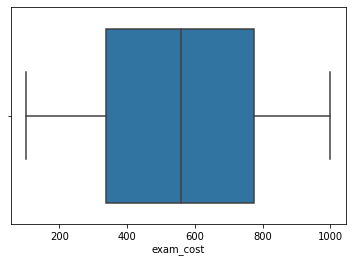

In [5]:
import seaborn as sns
sns.boxplot(x=df['exam_cost'])

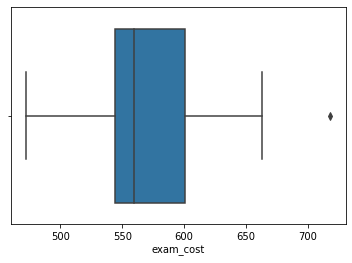

In [7]:
import seaborn as sns
sns.boxplot(x=df2['exam_cost'])

Outliers are above 700 could account for the exam cost that are at 900. 


 # Create a visualization that displayes doctor_name at the x value with doctor name and y- values with costs. While part of the body will serve as the key. Allows me to see cost per doctor.

In [22]:
list(df)

['service_number',
 'service_zip',
 'exam_date',
 'exam_body_part',
 'exam_cost',
 'doctor_npi',
 'doctor_name',
 'patient_name',
 'patient_birth_date',
 'claimant_ssn']

Text(0.5, 1.0, 'Exam Costs by doctor and body part')

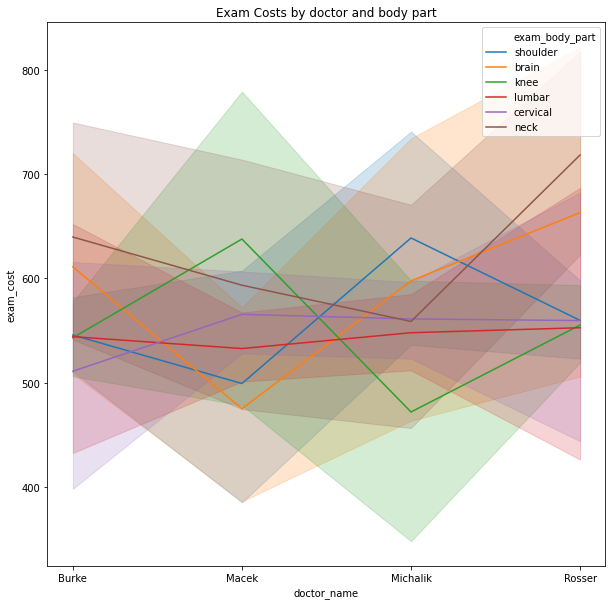

In [23]:
###-Plot1
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

ax = sns.lineplot(x='doctor_name', y="exam_cost",hue="exam_body_part",markers=True, dashes=False, data=df)
ax.set_title('Exam Costs by doctor and body part')

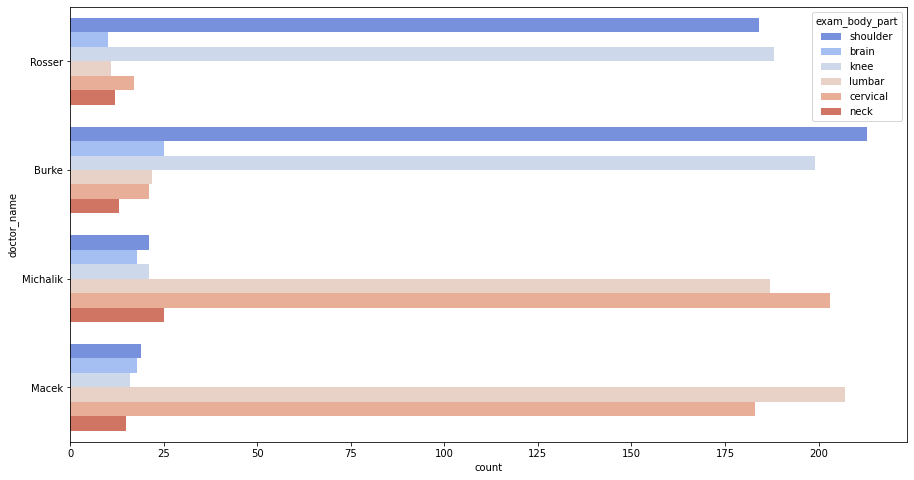

In [8]:
### plot 2 - BY SPECIALTY WITHIN Superscan diagnostics
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.countplot(y="doctor_name", hue="exam_body_part", data=df, palette="coolwarm")

Text(0.5, 1.0, 'Exam Costs by service zip and body part')

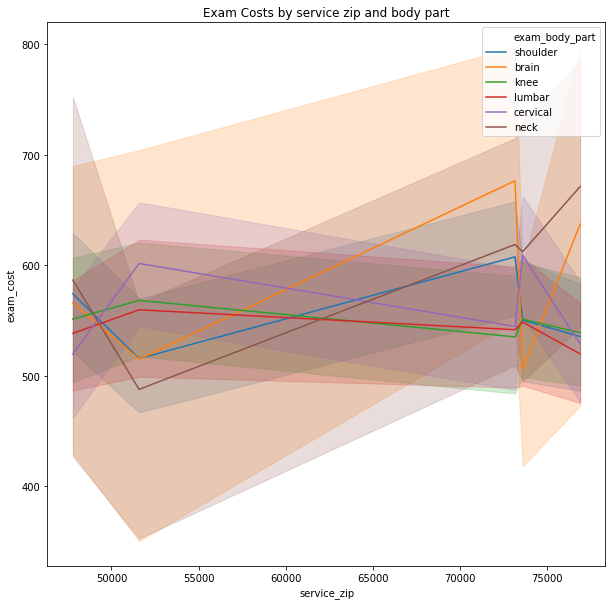

In [24]:
### Plot3
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

ax = sns.lineplot(x='service_zip', y="exam_cost",hue="exam_body_part",markers=True, dashes=False, data=df)
ax.set_title('Exam Costs by service zip and body part')